## Lecture 12 Exploratory Data Analysis with Pandas and Seaborn
* Understand the data types
* Detect any problems in the data file. 
* Detect any outliers or data that is questionable. 
* Understand the range/distribution of the variables
* Visualize the relationship between the variables

## Iris Flower

[UCI Data Repository](https://archive.ics.uci.edu/)

[Iris Flower Images](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Small classic data set used frequently teaching of data science


In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
df = pd.read_csv('iris.csv')

### Pandas 
We make use of pandas to load the data.  . 
You might find this tutorial useful. 
[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

The `.info()` method provides a basic overview of the contents of a data file.
 
    - object refers to categorical or text data 
    - int64 are integers
    - float64 are floating point numbers 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.keys() #This is the same thing as the columns of the table 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Two types of scientific questions:**
    
- Are there significant differences in the features (petal and sepal length and width) between flower types? - **statistics**
- Can I tell what flower it is from the features (petal and sepal length and width) - **machine learning**

You can examine the first few rows of the table in your jupyter notebook. 

In [4]:
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


You can also take a look at a random sample 

In [5]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
116,6.5,3.0,5.5,1.8,virginica
15,5.7,4.4,1.5,0.4,setosa
40,5.0,3.5,1.3,0.3,setosa
72,6.3,2.5,4.9,1.5,versicolor
147,6.5,3.0,5.2,2.0,virginica
31,5.4,3.4,1.5,0.4,setosa
58,6.6,2.9,4.6,1.3,versicolor
5,5.4,3.9,1.7,0.4,setosa
93,5.0,2.3,3.3,1.0,versicolor
148,6.2,3.4,5.4,2.3,virginica


### Using numpy with pandas Series 
Pandas Series can be operated on using numpy methods with two different syntax 

In [16]:
#Here I pass the data to numpy functions 
types = np.unique(df['species'])
print(types)
petal_length = np.mean(df['petal_length'])
print(petal_length)

['setosa' 'versicolor' 'virginica']
3.7580000000000005


But you can also use this syntax, where you use numpy functions as methods on the Series. 

In [17]:
#Here I invoke numpy functions as methods 
types = df['species'].unique()
print(types)
petal_length = df['petal_length'].mean()
print(petal_length)

['setosa' 'versicolor' 'virginica']
3.7580000000000005


### Descriptive Statistics
You can quickly grab descriptive statistics using `describe`

`describe` will ignore all the categorical variables, and only report on numeric variables. 

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For categorical variables, `.value_counts()` can be useful to summarize the data 

In [19]:
# How many samples do I have of each species
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Making plots using Seaborn

The seaborn libraries work directly on pandas dataframes for visualization. 

`seaborn` organizes calls to `matplotlib` into a single function. 

The strength of `seaborn` over `matplotlib` is that they have figured out how to combine many operations that we would normally do individually into a single program call. 

Notice, that I still make use of `matplotlib` to set up my figure, etc. Under the hood, `seaborn` is `matplotlib` 

Histograms provide useful ways to examine the distribution of values in your data.  

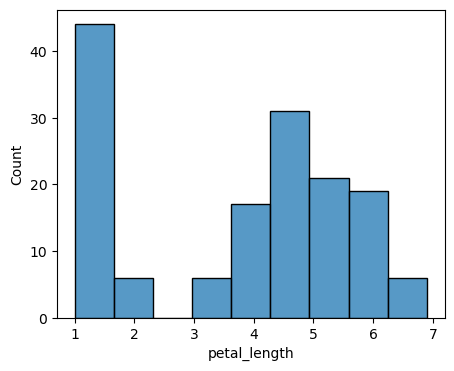

In [20]:
plt.figure(figsize=(5,4))
sns.histplot(df, x='petal_length')
plt.show()

What would be really nice is if we could visualize the 3 different species in different colors 

In all seaborn functions, you can assign the argument **hue** to a categorical variable, and display it with different colors. 

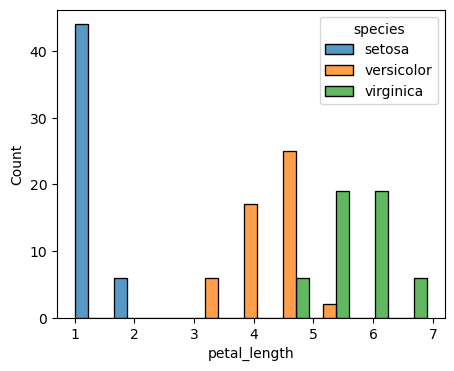

In [11]:
plt.figure(figsize=(5,4))
sns.histplot(df, x='petal_length', hue = 'species', multiple='dodge')
plt.show()

A boxplot can be extremely useful in detecting data that may have outliers.  

<Axes: >

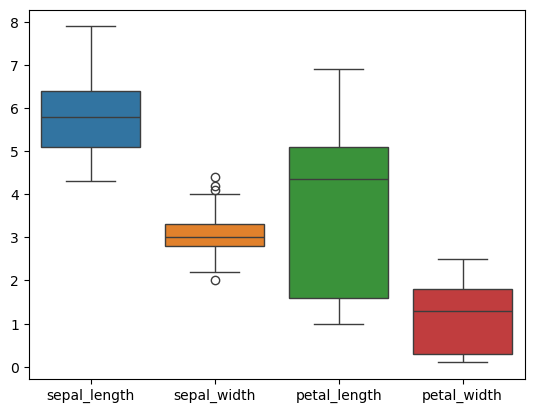

In [13]:
sns.boxplot(data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

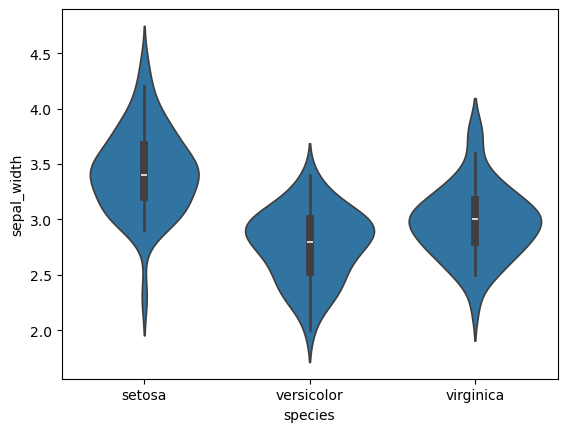

In [14]:
sns.violinplot( data=df, y = 'sepal_width', x = 'species')

### my favorite is the swarm plot 

<Axes: xlabel='species', ylabel='sepal_width'>

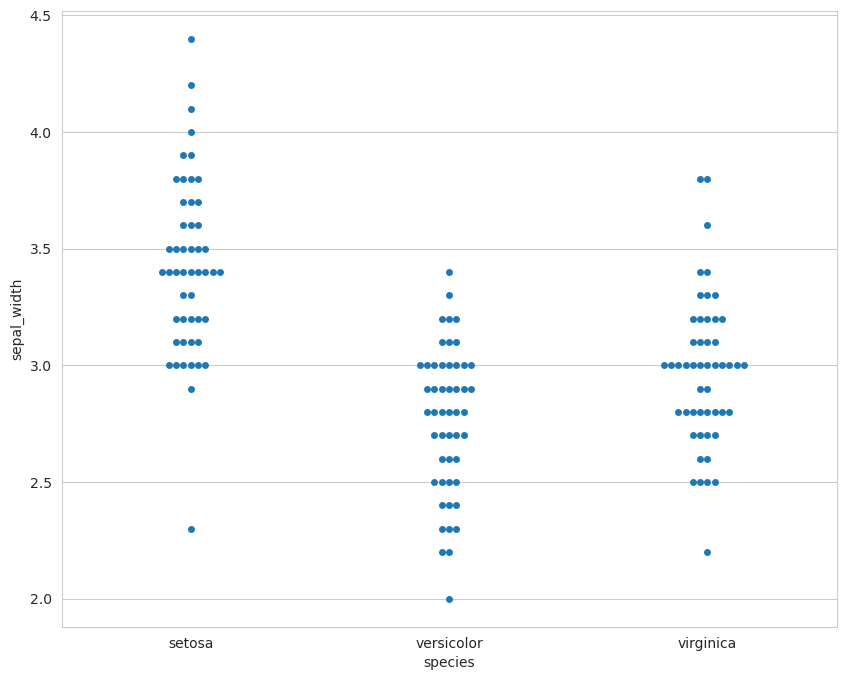

In [25]:

plt.figure(figsize=(10,8)) 
sns.swarmplot(y='sepal_width', x='species', data=df)
plt.show()

###  Sometimes I like to to look at joint plots 

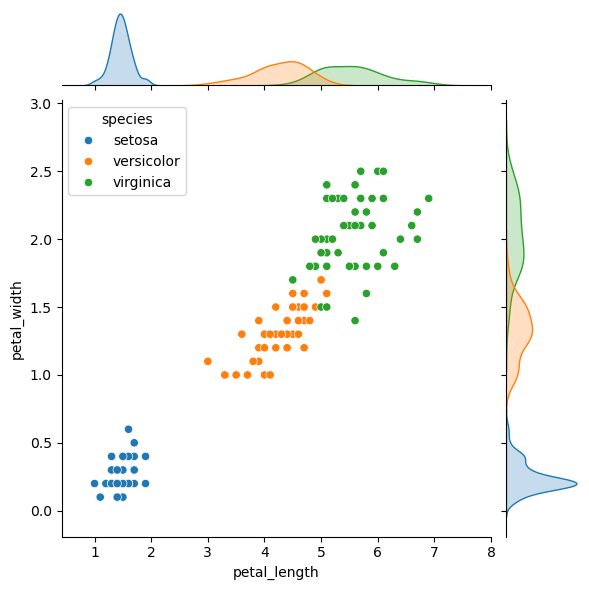

In [15]:
sns.jointplot(x='petal_length', y='petal_width', hue = "species",data=df)

If you just want to look at it all, `pairplot` provides a view of all of the data. 

/home/ramesh/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


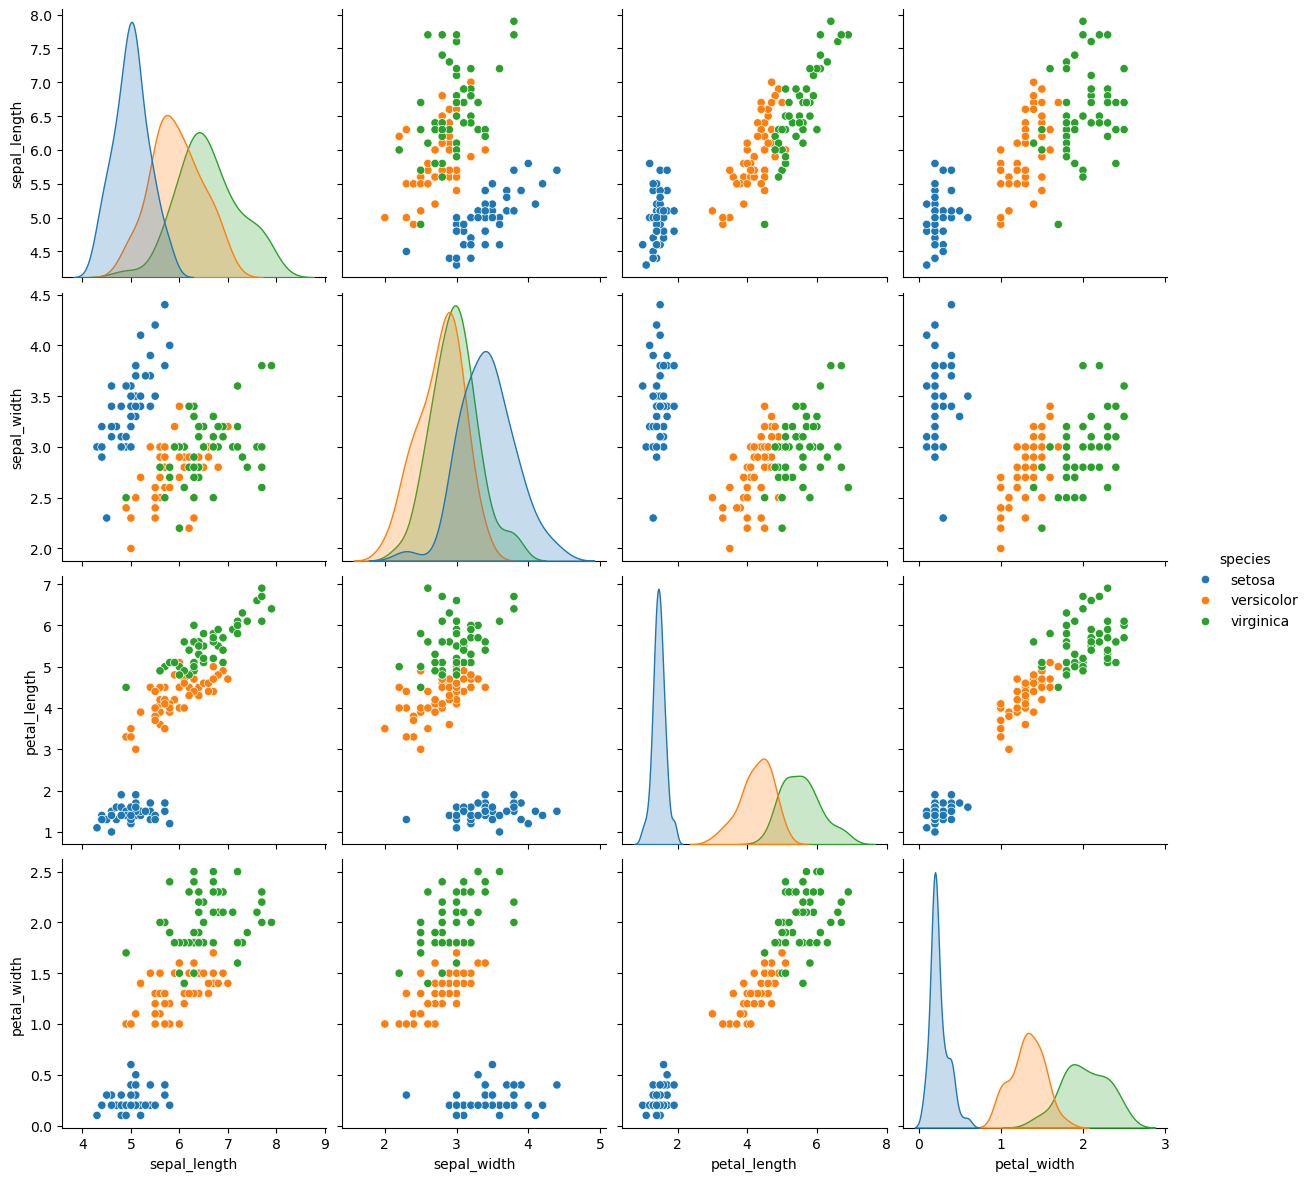

In [ ]:

sns.pairplot(df, hue="species", size=3);
plt.show()


**Pandas**
- pandas.read_csv()
- pandas.concat()
- pandas.get_dummies()
- DataFrame.info()
- DataFrame.head()
- DataFrame.sample()
- DataFrame.describe()
- DataFrame.unique()
- DataFrame.str
- DataFrame.groupby()
- DataFrame.sort_values()
- DataFrameGroupBy.size()


**seaborn**
- seaborn.boxplot()
- seaborn.histplot()
- seaborn.barplot()
- seaborn.countplot()
- seaborn.scatterplot()
- seaborn.violinplot()
- seaborn.lineplot() 
- seaborn.pairplot()
- seaborn.heatmap()